In [ ]:
import pandas as pd

funding_data = pd.read_csv('funding_data.csv')
payment_data = pd.read_csv('payment_data.csv')

merged_data = pd.merge(funding_data, payment_data, on='fund_id')

merged_data['fund_date'] = pd.to_datetime(merged_data['fund_date'])
merged_data['pmt_date'] = pd.to_datetime(merged_data['pmt_date'])

merged_data['year_month'] = merged_data['pmt_date'].dt.to_period('M')
total_paid = merged_data.groupby(['fund_id', 'year_month'])['amount'].sum().reset_index()

total_paid = pd.merge(total_paid, funding_data[['fund_id', 'fund_date', 'payback_amount']], on='fund_id')
total_paid['outstanding_balance'] = total_paid['payback_amount'] - total_paid['amount']
print(total_paid)


     fund_id year_month    amount   fund_date  payback_amount  \
0    5005269    2013-06  10362.00  2013-05-28            9594   
1    5005269    2013-07   -768.00  2013-05-28            9594   
2    5005601    2013-02   4366.00  2013-01-17           19575   
3    5005601    2013-03   3960.00  2013-01-17           19575   
4    5005601    2013-04  12608.00  2013-01-17           19575   
..       ...        ...       ...         ...             ...   
503  5077502    2023-12   3999.08  2023-12-18           47989   
504  5077502    2024-01   7998.16  2023-12-18           47989   
505  5077502    2024-02   7998.16  2023-12-18           47989   
506  5077502    2024-03  27993.60  2023-12-18           47989   
507  5079589    2024-03   9999.99  2024-03-15          400000   

     outstanding_balance  
0                -768.00  
1               10362.00  
2               15209.00  
3               15615.00  
4                6967.00  
..                   ...  
503             43989.92  
504

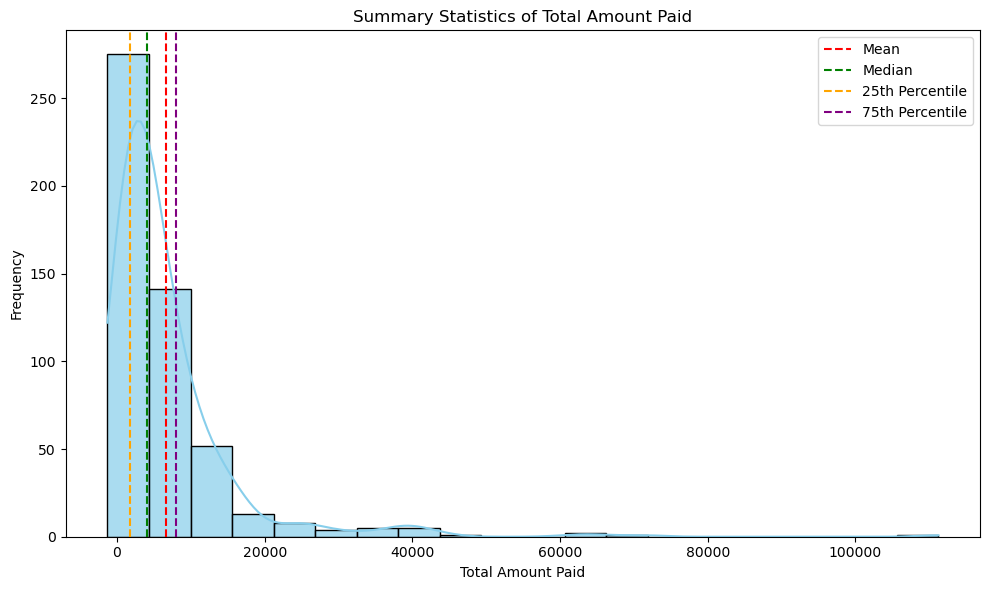

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(total_paid['amount'], bins=20, kde=True, color='skyblue', alpha=0.7)
plt.axvline(total_paid['amount'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(total_paid['amount'].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
plt.axvline(total_paid['amount'].quantile(0.25), color='orange', linestyle='dashed', linewidth=1.5, label='25th Percentile')
plt.axvline(total_paid['amount'].quantile(0.75), color='purple', linestyle='dashed', linewidth=1.5, label='75th Percentile')
plt.title('Summary Statistics of Total Amount Paid')
plt.xlabel('Total Amount Paid')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


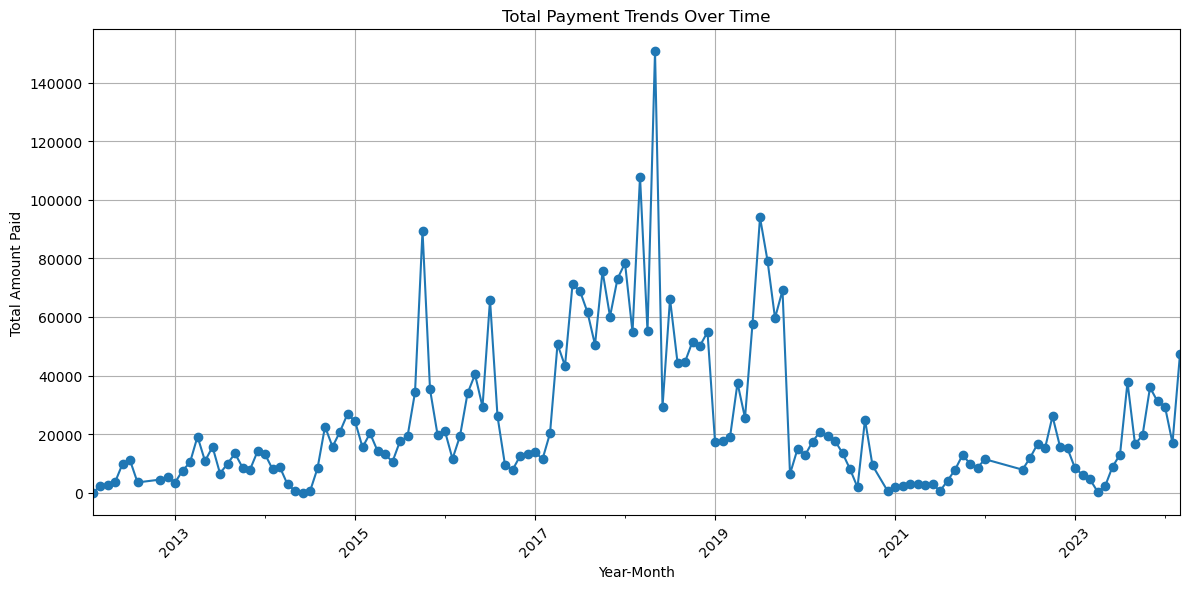

In [ ]:
import matplotlib.pyplot as plt

total_paid_monthly = total_paid.groupby('year_month')['amount'].sum()

plt.figure(figsize=(12, 6))
total_paid_monthly.plot(kind='line', marker='o', linestyle='-')
plt.title('Total Payment Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount Paid')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\gafma\AppData\Local\Temp\ipykernel_6816\2553442962.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


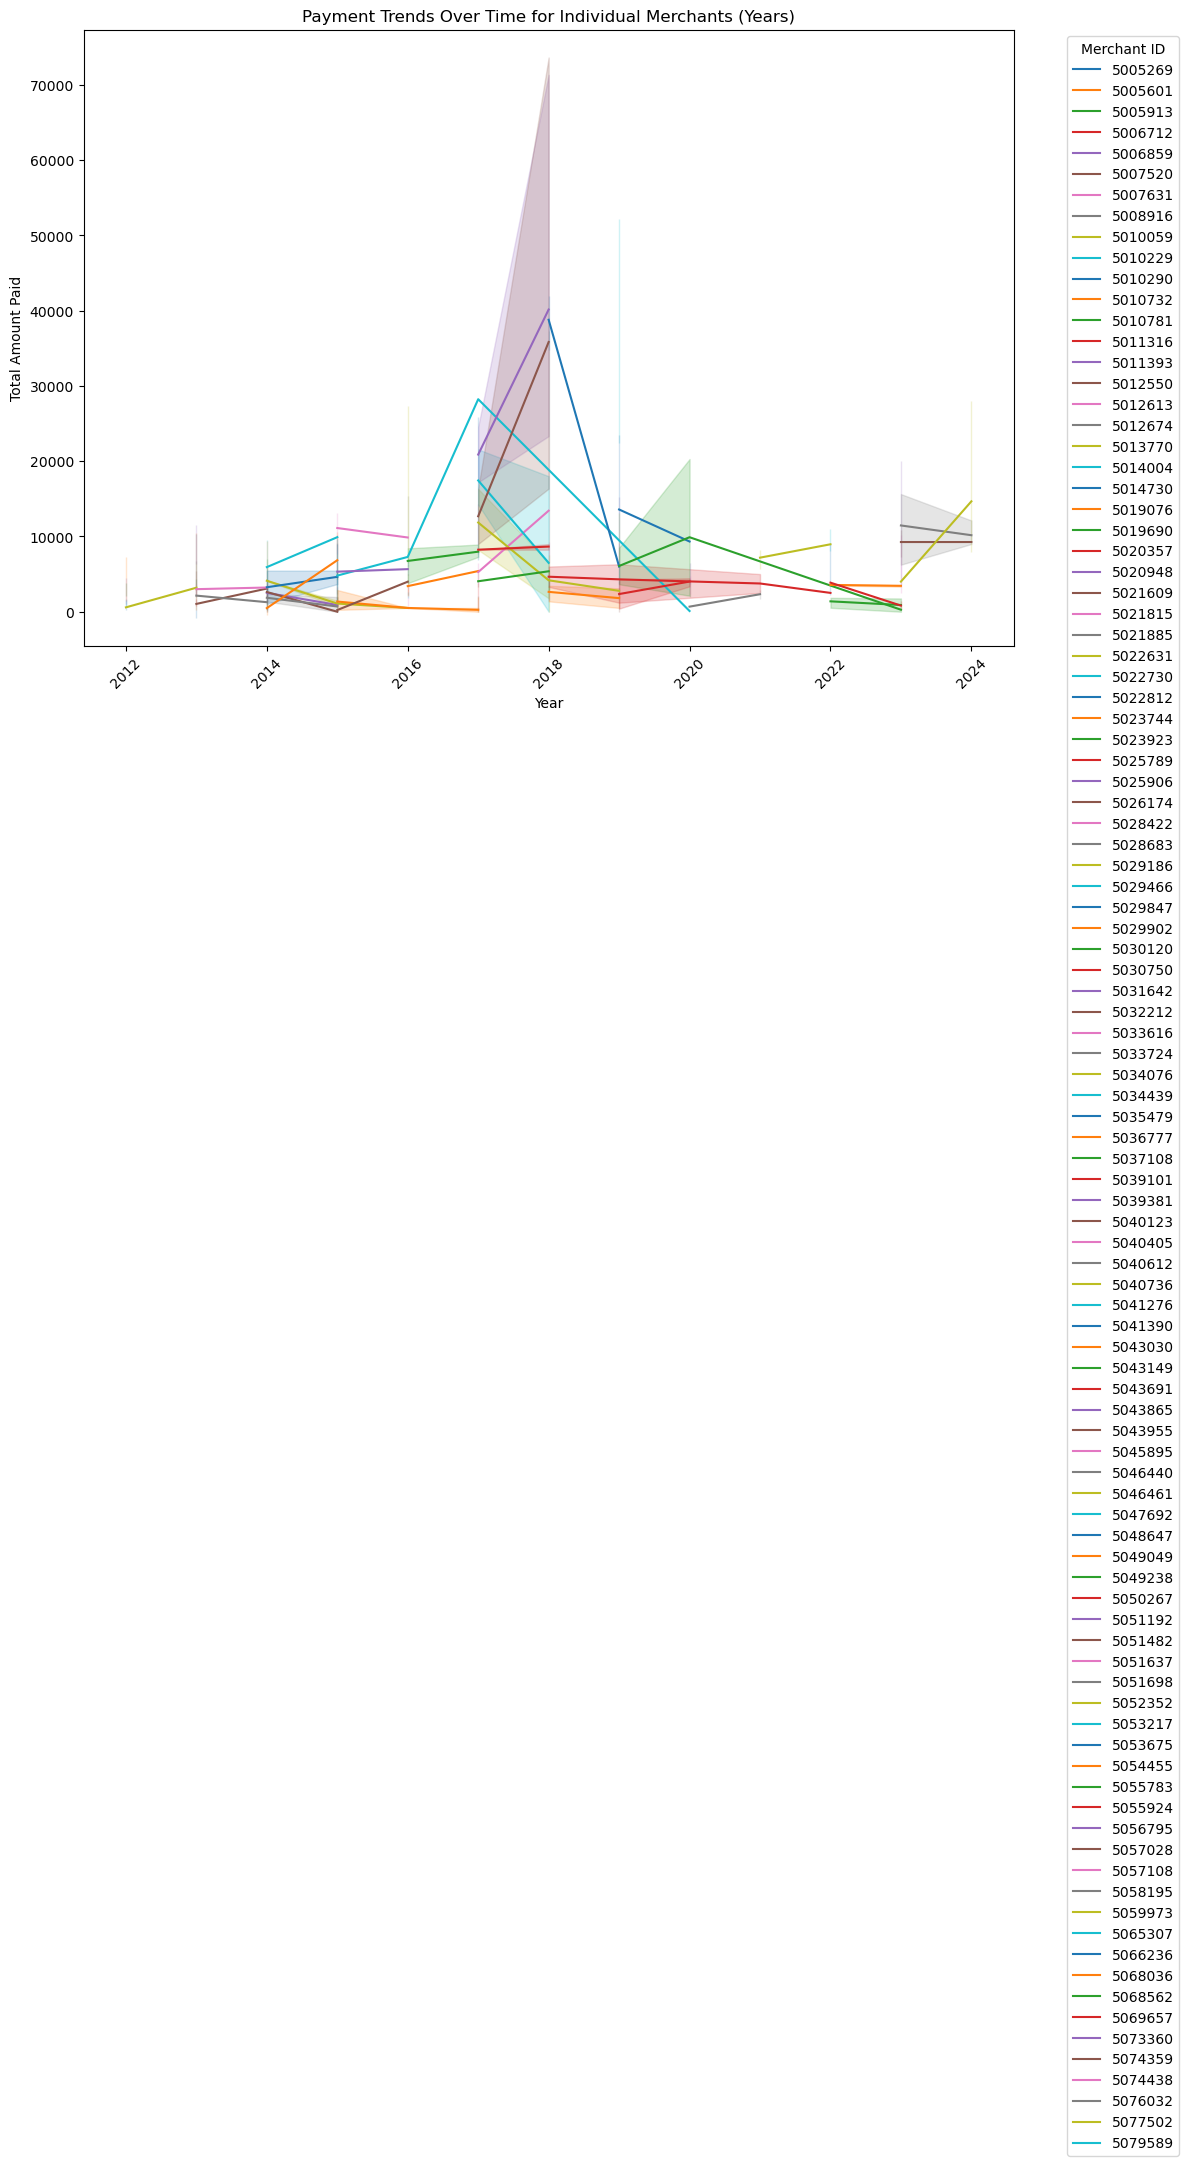

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

total_paid['year'] = total_paid['year_month'].dt.year
merchants = total_paid['fund_id'].unique()
plt.figure(figsize=(12, 8))

for merchant in merchants:
    merchant_data = total_paid[total_paid['fund_id'] == merchant]
    sns.lineplot(x='year', y='amount', data=merchant_data, label=merchant)

plt.title('Payment Trends Over Time for Individual Merchants (Years)')
plt.xlabel('Year')
plt.ylabel('Total Amount Paid')
plt.xticks(rotation=45)
plt.legend(title='Merchant ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


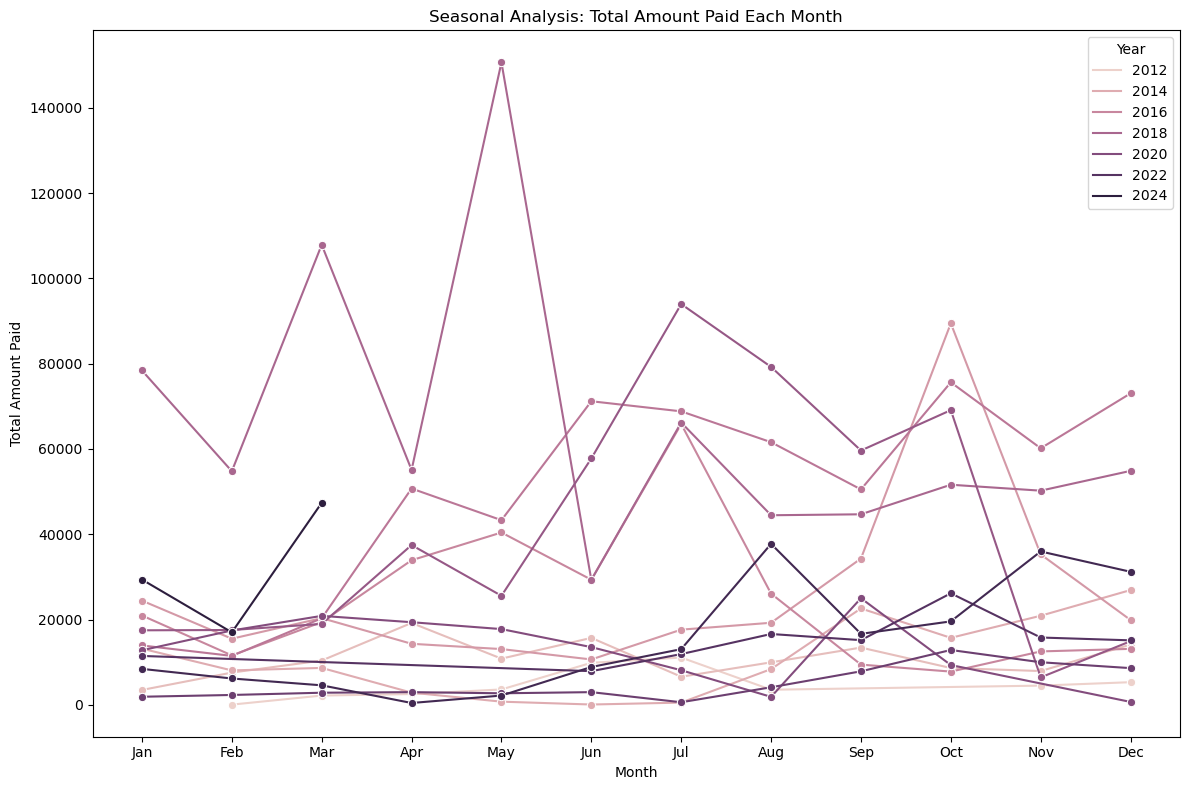

In [ ]:
import seaborn as sns

total_paid['year'] = total_paid['year_month'].dt.year
total_paid['month'] = total_paid['year_month'].dt.month

monthly_totals = total_paid.groupby(['year', 'month'])['amount'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='amount', hue='year', data=monthly_totals, marker='o')
plt.title('Seasonal Analysis: Total Amount Paid Each Month')
plt.xlabel('Month')
plt.ylabel('Total Amount Paid')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

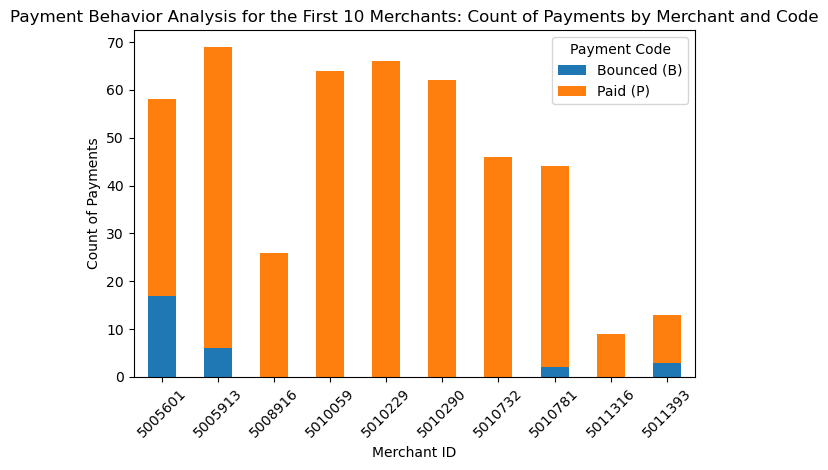

In [ ]:
first_10_merchants = payment_data[payment_data['fund_id'].isin(payment_data['fund_id'].unique()[:10])]

payment_behavior = first_10_merchants.groupby(['fund_id', 'pmt_code']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
payment_behavior.plot(kind='bar', stacked=True)
plt.title('Payment Behavior Analysis for the First 10 Merchants: Count of Payments by Merchant and Code')
plt.xlabel('Merchant ID')
plt.ylabel('Count of Payments')
plt.legend(title='Payment Code', labels=['Bounced (B)', 'Paid (P)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


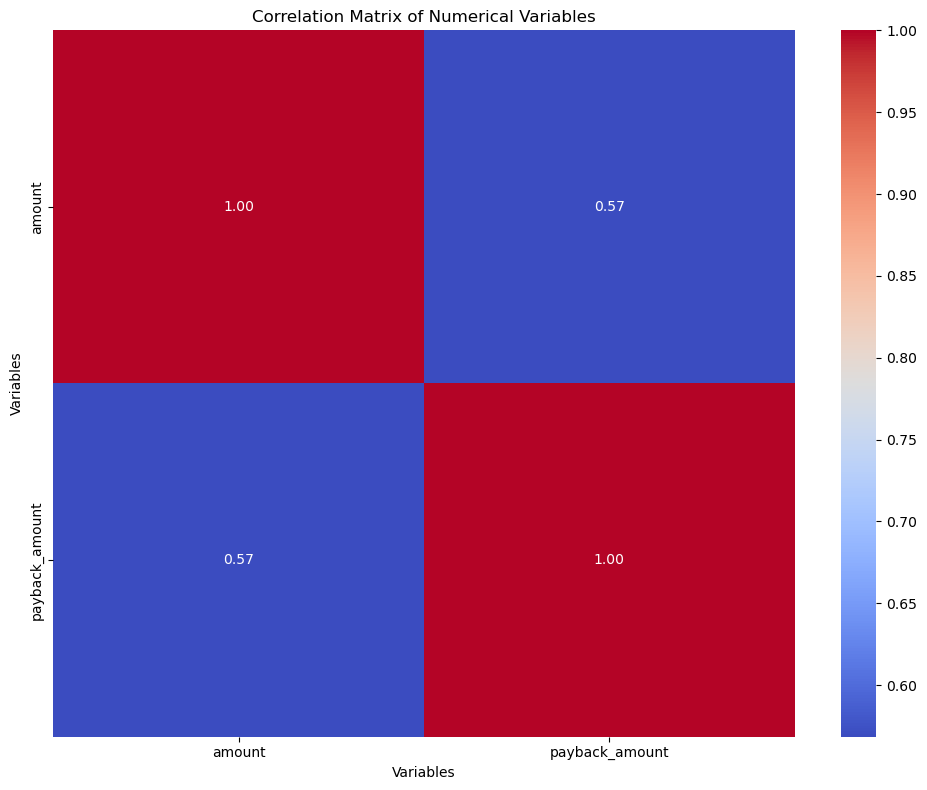

In [ ]:
numerical_vars = ['amount', 'payback_amount']
correlation_matrix = total_paid[numerical_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()
